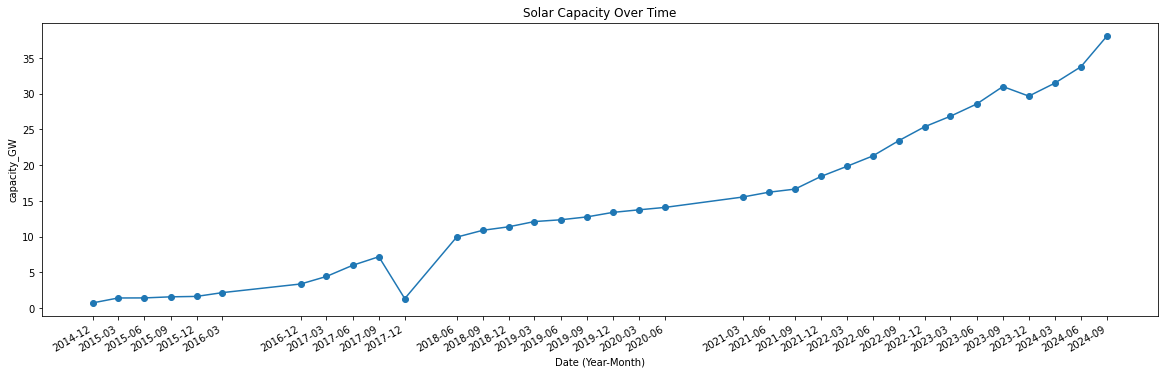

In [76]:
#####################################step1：获取历史数据，单位GW，下文中都用GW
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('光伏发电装机容量浙江累计值.csv',parse_dates=['date'])

# 假设你的 DataFrame 叫 df，其中有 'date' 和 'capacity_GW' 列
# 将 'date' 列转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])

# 格式化日期为年-月的字符串格式
df['year_month'] = df['date'].dt.strftime('%Y-%m')

# 使用 Pandas 的绘图功能
plt.figure(figsize=(20, 6))  # 设置图形大小
plt.plot(df['date'], df['capacity_GW'], marker='o', linestyle='-')

# 设置x轴标签为年-月的格式
plt.xticks(df['date'], df['year_month'])

# 设置标签和标题
plt.xlabel('Date (Year-Month)')
plt.ylabel('capacity_GW')
plt.title('Solar Capacity Over Time')

# 自动调整日期标签
plt.gcf().autofmt_xdate()

# 显示图形
plt.show()

In [77]:
df

,date,capacity_GW,year_month
0,2014-12-01,0.7300,2014-12
1,2015-03-01,1.4200,2015-03
2,2015-06-01,1.4300,2015-06
3,2015-09-01,1.5800,2015-09
4,2015-12-01,1.6400,2015-12
5,2016-03-01,2.1700,2016-03
6,2016-12-01,3.3800,2016-12
7,2017-03-01,4.4300,2017-03
8,2017-06-01,5.9900,2017-06
9,2017-09-01,7.1900,2017-09


In [78]:
#####################################step2：制作神经网络数据集
N=4 ##seq_len长度
feas_name=['capacity_GW']
for i in range(1,N):
    df[f'capacity-{i}']=df['capacity_GW'].shift(i)
    feas_name.append(f'capacity-{i}')
df['y']=df['capacity_GW'].shift(-1) ##y指要预测的真实值
df=df.dropna()
df

,date,capacity_GW,year_month,capacity-1,capacity-2,capacity-3,y
3,2015-09-01,1.5800,2015-09,1.4300,1.420,0.730,1.6400
4,2015-12-01,1.6400,2015-12,1.5800,1.430,1.420,2.1700
5,2016-03-01,2.1700,2016-03,1.6400,1.580,1.430,3.3800
6,2016-12-01,3.3800,2016-12,2.1700,1.640,1.580,4.4300
7,2017-03-01,4.4300,2017-03,3.3800,2.170,1.640,5.9900
8,2017-06-01,5.9900,2017-06,4.4300,3.380,2.170,7.1900
9,2017-09-01,7.1900,2017-09,5.9900,4.430,3.380,1.3300
10,2017-12-01,1.3300,2017-12,7.1900,5.990,4.430,9.9300
11,2018-06-01,9.9300,2018-06,1.3300,7.190,5.990,10.8900
12,2018-09-01,10.8900,2018-09,9.9300,1.330,7.190,11.3800


In [79]:
#####################################step3：用sklearn搭建BP神经网络，训练+测试效果
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error

In [80]:
x=df[feas_name].values
y=df['y'].values
# 划分数据集为训练集和验证集
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2,shuffle=False)

In [81]:
# 初始化MLP分类器
mlp = MLPRegressor(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42)
# 使用训练集来训练MLP模型
mlp.fit(train_x, train_y)
# 使用训练好的模型进行预测
pred_y = mlp.predict(test_x)
# 计算模型在测试集上的准确率
accuracy = 1-mean_absolute_percentage_error(test_y, pred_y)
print(f"Accuracy on test set: {accuracy:.2f}")
print('pred_y:',pred_y)
print('test_y:',test_y)

Accuracy on test set: 0.96
pred_y: [26.51913498 28.60998059 30.57583453 32.65049048 34.11251797 34.98886855
 36.24228015]
test_y: [26.851  28.56   31.003  29.665  31.4735 33.7733 38.0949]


d:\software\anaconda\envs\cty\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


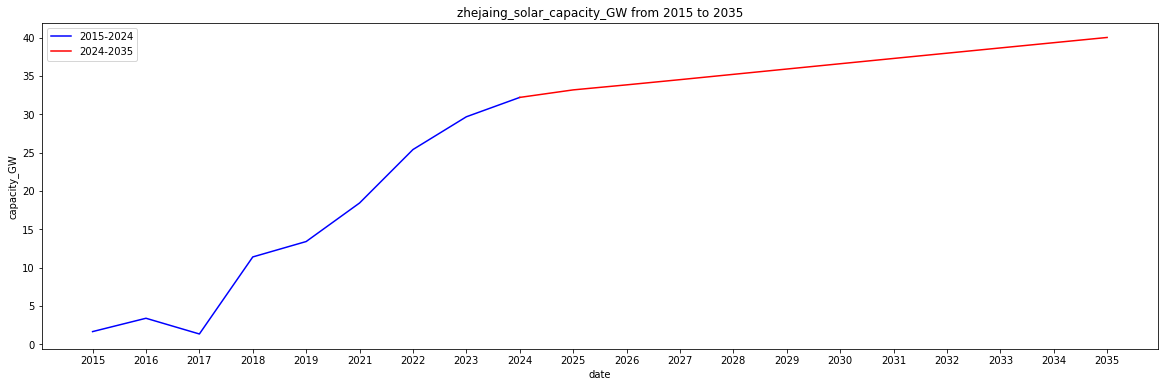

In [82]:
#####################################step4：预测结果可视化
stack=list(df['capacity_GW'].iloc[-N:])
res=[]
start_date = '2024-09-01'
end_date = '2035-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='3M',closed='right')
pred_steps=len(date_range)
for step in range(pred_steps):
    pred_y = mlp.predict(np.array(stack[-N:]).reshape(1,-1))
    pred_y=pred_y*0.88  #######这里加了一个增长系数0.88，不然指数增长不契合实际
    res.append(pred_y[0])
    stack.append(pred_y[0])
res=pd.DataFrame(res,columns=['capacity_GW'])
res['date']=date_range

df_concat=pd.concat([df[['capacity_GW','date']],res])
# 格式化日期为年-月的字符串格式
df_concat['year_month'] = df_concat['date'].dt.strftime('%Y-%m')
# 筛选出每年12月份的数据
december_data = df_concat[df_concat['date'].dt.month == 12]
# 提取年份和相应的数据列
result = december_data.groupby(december_data['date'].dt.year)['capacity_GW'].sum().reset_index()
result.columns = ['date', 'capacity_GW']

# 根据日期范围绘制折线图
plt.figure(figsize=(20, 6))

# 划分2015到2024年的数据
data_2015_to_2024 = result[(result['date']>= 2015) & (result['date']<= 2024)]
plt.plot(data_2015_to_2024['date'].apply(str), data_2015_to_2024['capacity_GW'], label='2015-2024', color='blue')

# 划分2024到2035年的数据
data_2024_to_2035 = result[(result['date']>= 2024) & (result['date']<= 2035)]
plt.plot(data_2024_to_2035['date'].apply(str), data_2024_to_2035['capacity_GW'], label='2024-2035', color='red')

plt.xlabel('date')
plt.ylabel('capacity_GW')
plt.title('zhejaing_solar_capacity_GW from 2015 to 2035')
plt.legend()
plt.show()

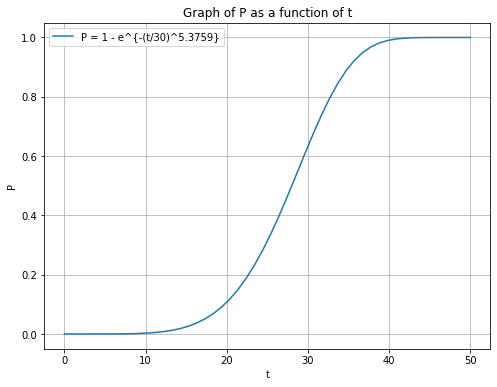

In [83]:
#####################################step5：报废cdf函数可视化
# 定义cdf函数
def calculate_P(t, a=30, b=5.3759): ##这里a和b系数参考文献
    k = -(t / a)**b
    return 1 - np.exp(k)

# 绘制图像
t_values = np.linspace(0, 50, 50)  # 设定 t 的取值范围

P_values = calculate_P(t_values)

plt.figure(figsize=(8, 6))
plt.plot(t_values, P_values, label=f'P = 1 - e^{{-(t/{30})^{5.3759}}}')
plt.xlabel('t')
plt.ylabel('P')
plt.title('Graph of P as a function of t')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
#####################################step6：计算2025-2035浙江每年总报废，并按人口分布计算11个市的报废量
scrap_amount = [] ##报废量
years=[i for i in range(2025,2036)]
for year in years:
    xx=result[(result['date']< year)] ##找到year之前所有年份
    cap=result[(result['date']==year)]['capacity_GW'].iloc[0] ##找到当年的容量
    xx['life']=year-xx['date']
    xx['increase']=cap-xx['capacity_GW']
    xx['scrap_prob']=xx['life'].apply(calculate_P)
    scrap=sum(xx['increase']*xx['scrap_prob'])
    scrap_amount.append(scrap)

final_res=pd.DataFrame()
final_res['year']=years
final_res['total_scrap_amount']=scrap_amount

renkou={
    'hangzhou': 18.8*0.01,
    'ningbo': 14.6*0.01,
    'wenzhou': 14.7*0.01,
    'jiaxing': 8.4*0.01,
    'huzhou': 5.2*0.01,
    'shaoxing': 8.1*0.01,
    'jinhua': 10.8*0.01,
    'quzhou': 3.5*0.01,
    'zhoushan': 1.8*0.01,
    'taizhou': 10.2*0.01,
    'lishui': 3.8*0.01
}

for city in renkou.keys():
    final_res[f'{city}_']=final_res['total_scrap_amount']*renkou[city]
final_res

C:\Users\笨笨呆呆\AppData\Local\Temp/ipykernel_23600/1431320634.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['life']=year-xx['date']
C:\Users\笨笨呆呆\AppData\Local\Temp/ipykernel_23600/1431320634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['increase']=cap-xx['capacity_GW']
C:\Users\笨笨呆呆\AppData\Local\Temp/ipykernel_23600/1431320634.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,year,total_scrap_amount,hangzhou_,ningbo_,wenzhou_,jiaxing_,huzhou_,shaoxing_,jinhua_,quzhou_,zhoushan_,taizhou_,lishui_
0,2025,0.170366,0.032029,0.024873,0.025044,0.014311,0.008859,0.013800,0.018400,0.005963,0.003067,0.017377,0.006474
1,2026,0.306737,0.057667,0.044784,0.045090,0.025766,0.015950,0.024846,0.033128,0.010736,0.005521,0.031287,0.011656
2,2027,0.525553,0.098804,0.076731,0.077256,0.044146,0.027329,0.042570,0.056760,0.018394,0.009460,0.053606,0.019971
3,2028,0.863352,0.162310,0.126049,0.126913,0.072522,0.044894,0.069931,0.093242,0.030217,0.015540,0.088062,0.032807
4,2029,1.367487,0.257088,0.199653,0.201021,0.114869,0.071109,0.110766,0.147689,0.047862,0.024615,0.139484,0.051965
5,2030,2.098360,0.394492,0.306361,0.308459,0.176262,0.109115,0.169967,0.226623,0.073443,0.037770,0.214033,0.079738
6,2031,3.131300,0.588684,0.457170,0.460301,0.263029,0.162828,0.253635,0.338180,0.109596,0.056363,0.319393,0.118989
7,2032,4.558253,0.856952,0.665505,0.670063,0.382893,0.237029,0.369218,0.492291,0.159539,0.082049,0.464942,0.173214
8,2033,6.489114,1.219954,0.947411,0.953900,0.545086,0.337434,0.525618,0.700824,0.227119,0.116804,0.661890,0.246586
9,2034,9.052418,1.701855,1.321653,1.330705,0.760403,0.470726,0.733246,0.977661,0.316835,0.162944,0.923347,0.343992


In [86]:
final_res.to_csv('final_res.csv')